**<ins>Introduction</ins>**
==
In the gaming industry, understanding player behavior is crucial for designing engagement strategies and improving retention. One common strategy used by game developers is promoting in-game newsletters, which keep players informed about updates, events, and promotions. These newsletters are typically opt-in, meaning players choose whether or not to subscribe. Understanding what kinds of players are more likely to subscribe can help developers better target their communication efforts.

In this project, we aim to explore the question:
**Can a player's playtime and age predict whether they subscribe to the game-related newsletter in <ins>players.csv</ins>?**

By identifying potential patterns in subscription behavior based on quantitative characteristics, this analysis can offer insight into which types of players are more engaged or committed to the game.

To explore this question, we used a dataset titled <ins>players.csv</ins>, which contains information on 196 individuals who play the game. This dataset includes 7 variables:

<ins>players.csv</ins> Dataset
---

| Variable               | Type                | Description  |
|------------------------|---------------------|--------------|
| **experience**         |<chr\>| Player's level of in-game experience.|
| **subscribe**          |<lgl\>| Indicates if player is subscribed to in-game newsletters.|
| **hashedEmail**        |<chr\>| Player's anonymous email.|
| **played_hours**       |<dbl\>| Time playing session started (relative).|
| **name**               |<chr\>| Player's in-game name.|
| **gender**             |<chr\>| Player's gender.|
| **Age**                |<dbl\>| Player's age.|


While most variables are not directly relevant to this project, we focus on the numeric variables ```played_hours``` and ```Age``` as predictors, and ```subscribe``` as the response variable. It's worth noting that the dataset contains some outliers in ```played_hours```, but we chose to keep them because they may represent highly engaged players whose behavior is important for predicting newsletter subscription patterns.

**<ins>Methods & Results</ins>**
==

In [8]:
### Run this cell for initialization of packages
library(tidyverse)
library(tidymodels)
library(cowplot)
library(repr)
library(RColorBrewer)
library(gridExtra)
options(repr.matrix.max.rows = 6)
# source("cleanup.R")
set.seed(4)

In [9]:
set.seed(5)

# Set url's from github repository
players_url <- "https://raw.githubusercontent.com/Alonso181006/Individual-Project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/Alonso181006/Individual-Project/refs/heads/main/sessions.csv"

# Read the data from the url's
players_data <- read_csv(players_url)
sessions_data <- read_csv(sessions_url)

# Count number of sessions for each user
sessions_data_count <- sessions_data |>
    group_by(hashedEmail) |>
    summarize(number_sessions = n())

# Renamed column
session_data_tidy <- sessions_data_count |>
    rename(hashed_email = hashedEmail)

# Combine Two Data Frames
players_data_combine <- players_data |>
    left_join(session_data_tidy, by = "hashed_email")

# Update Data Frame to replace NA values, and set subscribe column as a factor 
players_data_update <- players_data_combine |>
    mutate(number_sessions = replace_na(number_sessions, 0), 
          subscribe = as.factor(subscribe)) 

# Add a column that sets the experience level as a rank from 1-5 (inclusive)
players_data <- players_data_update|>
    mutate(rank = as.integer(factor(experience, 
                                    levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))))
# Display Data Set
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashed_email, name, gender
dbl (2): played_hours, age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashed_email,played_hours,name,gender,age,number_sessions,rank
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,5
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,4
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,4
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1,2
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6,2
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,1,5


### Computing summary statistics all quantitative variables (played_hours, Age) in <ins>players.csv</ins>

In [10]:
# storing the selected columns in a variable
players_selected <- select(players_data, played_hours, age)

# calculating the mean
players_mean <- players_selected |>
    map_df(mean, na.rm = TRUE) |>
    rename(mean_played_hours = played_hours, mean_age = age)

players_mean

# calculating the median
players_median <- players_selected |>
    map_df(median, na.rm = TRUE) |>
    rename(median_played_hours = played_hours, median_age = age)

# calculating the mode
players_mode <- players_selected |>
    map_df(mode) |>
    rename(mode_played_hours = played_hours, mode_age = age)

# calculating the Standard Deviation (SD)
players_sd <- players_selected |>
    map_df(sd, na.rm = TRUE) |>
    rename(sd_played_hours = played_hours, sd_age = age)

# calculating the min 
players_min <- players_selected |>
    map_df(min, na.rm = TRUE) |>
    rename(min_played_hours = played_hours, min_age = age)

# calculating the max
players_max <- players_selected |>
    map_df(max, na.rm = TRUE) |>
    rename(max_played_hours = played_hours, max_age = age)

# all summary statistics of played_hours and Age
summary_combined <- bind_cols(players_mean, players_median, players_mode, players_sd, players_max, players_min)
summary_combined

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


mean_played_hours,mean_age,median_played_hours,median_age,mode_played_hours,mode_age,sd_played_hours,sd_age,max_played_hours,max_age,min_played_hours,min_age
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.845918,20.52062,0.1,19,numeric,numeric,28.35734,6.174667,223.1,50,0,8


`summarise()` has grouped output by 'rank'. You can override using the
`.groups` argument.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


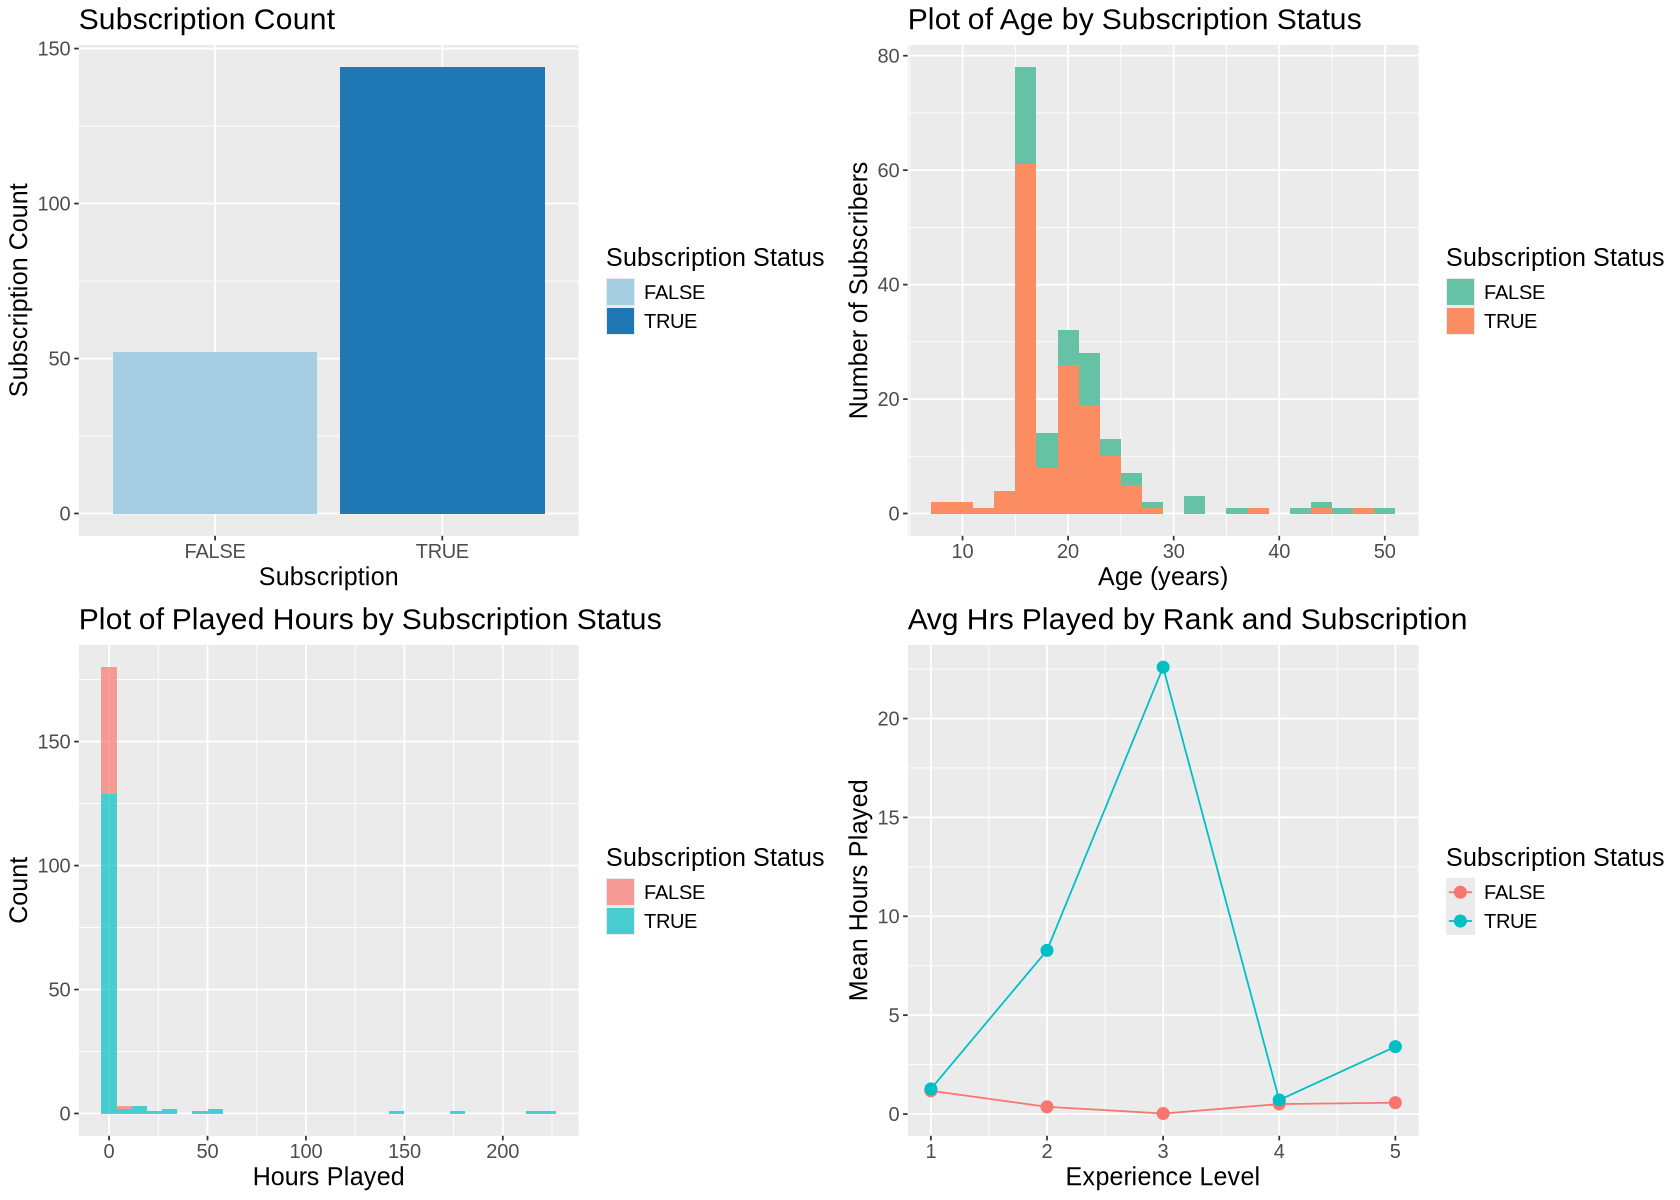

In [11]:
# Plot to Visualize Relationship between Subscribe & Played Hours, Experience, & Age

# Bar plot of subscription status counts
subsribe_bar <- players_data |>
    ggplot(aes(x = subscribe, fill = subscribe)) + 
    geom_bar() + 
    labs(x = "Subscription", 
         y = "Subscription Count", 
         fill = "Subscription Status",
         title = "Subscription Count") + 
    scale_fill_brewer(palette = "Paired") +
    theme(text = element_text(size = 15)) 

# Histogram showing the distribution of age, colored by subscription status.
age_by_sub <- players_data |>
    ggplot(aes(x = age, fill = subscribe)) +
    geom_histogram(binwidth = 2) +
    labs(x = "Age (years)", y = "Number of Subscribers", fill = "Subscription Status") +
    ggtitle("Plot of Age by Subscription Status") +
    theme(text = element_text(size = 15)) +
    scale_fill_brewer(palette = "Set2")

# Histogram showing the distribution of played hours, colored by subscription status.
subscription_plot <- players_data |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(bins = 30, alpha = 0.7) +
    labs(title = "Plot of Played Hours by Subscription Status", 
         x = "Hours Played", 
         y = "Count", 
         fill = "Subscription Status") +
    theme(text = element_text(size = 15))

# Finding average played hours based on rank and subscription
players_data_avg_hours <- players_data |>
  group_by(rank, subscribe) |>
  summarise(mean_hours = mean(played_hours, na.rm = TRUE)) |>
  ungroup()

# Visualize average hours against experience level
players_plot_outliers <- players_data_avg_hours |>
    ggplot(aes(x = rank, y = mean_hours, color = subscribe)) +
    geom_line() +
    geom_point(size = 3) +
    labs(x = "Experience Level", 
         y = "Mean Hours Played", 
         color = "Subscription Status", 
         title = "Avg Hrs Played by Rank and Subscription") +
    theme(text = element_text(size = 15))

# Combine plots into 2x2 grid layout .
options(repr.plot.width = 14, repr.plot.height = 10)
plot_grid(subsribe_bar, age_by_sub, subscription_plot, players_plot_outliers, nrow = 2, ncol = 2)

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 26 rows.
               ✖ Assigned data has 27 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 27 to size 26.

There were issues with some computations   A: x1

There were issues with some computations   A: x2





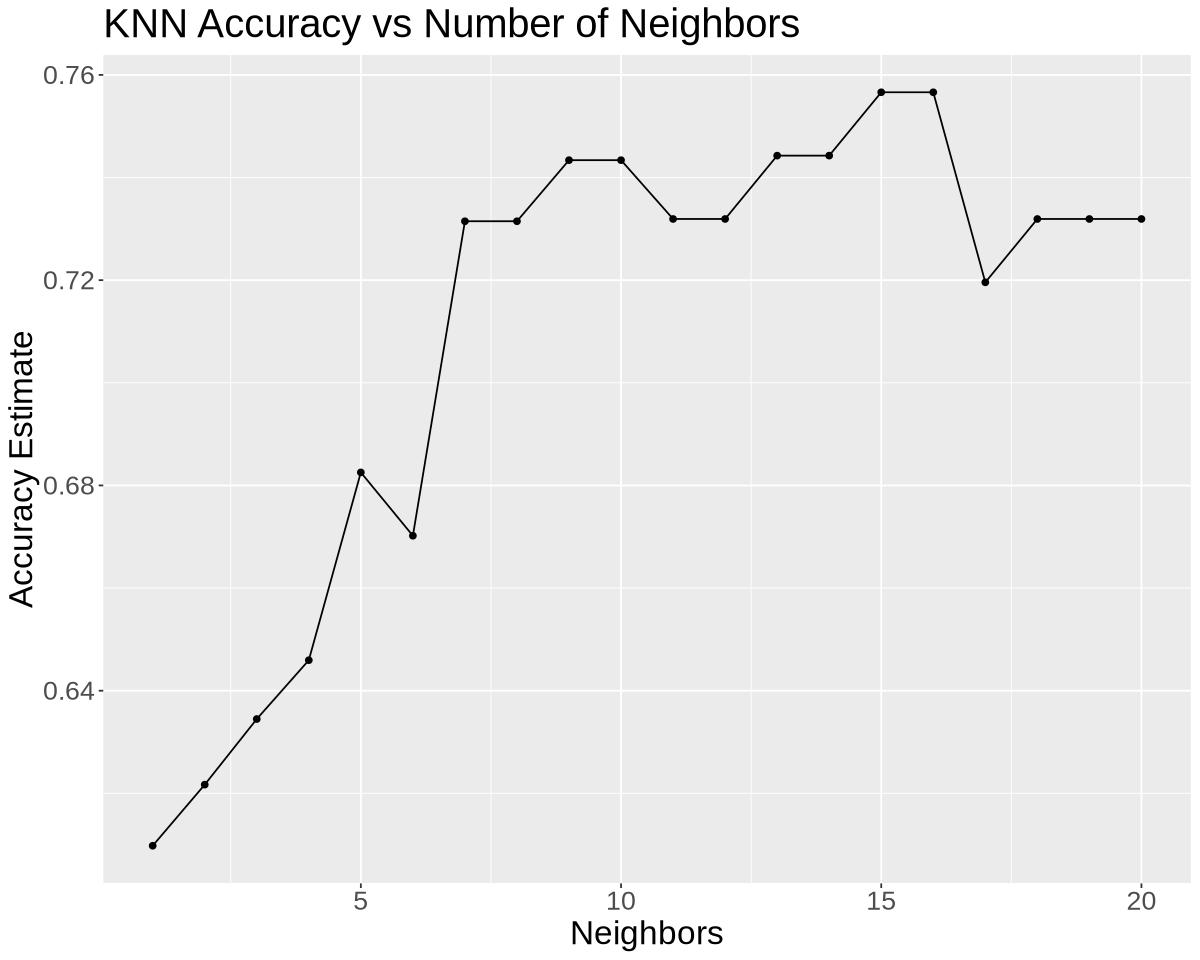

In [12]:
# Set seed to prevent different splits of data
set.seed(5)

# Split data into training and testing sets at 30/70 split
players_split <- initial_split(players_data, prop = 0.7, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

# Create players recipe for Classification
players_recipe <- recipe(subscribe ~ age + played_hours + rank, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Create player knn-model, tuning the neighbor value
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# Perform cross-validation using 5-fold
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

# Create a tibble of possible 'neighbors' values 1 to 10
gridvals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

# Setup workflow to test k values with cross-validation
players_wkflw <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    tune_grid(resamples = players_vfold, grid = gridvals)

# Collect and Filter the metrics for evaluation.
players_results <- players_wkflw |>
    collect_metrics() |>
    filter(.metric == "accuracy")

# Pull Best K value
best_k = players_results |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)

# Plot the Accuracy vs Neighbors estimate
players_plot <- players_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "KNN Accuracy vs Number of Neighbors") +
    theme(text = element_text(size = 20))

#Display Plot
options(repr.plot.width = 10, repr.plot.height = 8)
players_plot

In [13]:
# Set seed 
set.seed(5)

# Re-create player model using the optimal k value
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification") 

# Fit the workflow to the player traing data
players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_train)

# Predict the subcription of players in test set
players_summary <- players_fit |>
    predict(players_test) |>
    bind_cols(players_test) 

# Compute & Display accuracy of the Knn Classfication on test dataset
players_accuracy <- players_summary |>
    metrics( truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")
players_accuracy

# Compute & Display precision of the Knn Classfication on test dataset
players_precision <- players_summary |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second")
players_precision

# Compute & Display recall of the Knn Classfication on test dataset
players_recall <- players_summary |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second")
players_recall

# Compute & Display confusion matrix of the Knn Classfication on test dataset
players_matrix <- players_summary |>
    conf_mat(truth = subscribe, estimate = .pred_class)
players_matrix

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7666667


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7586207


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,1


          Truth
Prediction FALSE TRUE
     FALSE     2    0
     TRUE     14   44

**<ins>Discussion</ins>**
==

**<ins>References</ins>**
==

*Data Science, A First Introduction*
https://datasciencebook.ca/